<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/visualisation/matplotlib.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/visualisation/matplotlib.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/visualisation/matplotlib.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABvisualisation%20matplotlib%C2%BB&security.allowlist.enabled=false)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=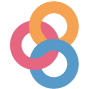)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/visualisation/matplotlib.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/visualisation/matplotlib.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist//__w/python-datascientist/python-datascientist/notebooks/course/visualisation/matplotlib.ipynb)

La pratique de la visualisation se fera, dans ce cours, en répliquant des graphiques qu'on peut trouver sur
la page de l'*open-data* de la ville de Paris 
[ici](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/information/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name).

Ce TP vise à initier:

* Aux packages [matplotlib](https://matplotlib.org/) et
[seaborn](https://seaborn.pydata.org/) pour la construction de graphiques figés
* Au package [plotly](https://plotly.com/python/) pour les graphiques 
dynamiques, au format HTML

Nous verrons par la suite la manière de construire des cartes facilement avec
des formats équivalents.

Un sous-ensemble des données de [paris open data](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/information/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name) a été mis à disposition
sur {{< githubrepo >}} pour faciliter l'import (élimination des colonnes
qui ne nous serviront pas mais ralentissent l'import).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Premier graphique avec l'API `matplotlib` de `pandas`

{{% panel status="exercise" title="Exercice" icon="fas fa-pencil-alt" %}}

**Exercice 1 : Importer les données et produire un premier graphique**

1. Importer les données de compteurs de vélos. Vous pouvez utiliser l'url <https://github.com/linogaliana/python-datascientist/raw/master/data/bike.csv>.
:warning: Il s'agit de données
compressées au format `gzip`, il faut donc utiliser l'option `compression`


In [ ]:
#1. Importation des données de vélo
import pandas as pd
df = pd.read_csv("https://github.com/linogaliana/python-datascientist/raw/master/data/bike.csv", compression = 'gzip')
df.head()

```
##   Identifiant du compteur  ... Date d'installation du site de comptage
## 0            100003096-SC  ...                              2012-02-22
## 1            100003096-SC  ...                              2012-02-22
## 2            100003096-SC  ...                              2012-02-22
## 3            100003096-SC  ...                              2012-02-22
## 4            100003096-SC  ...                              2012-02-22
## 
## [5 rows x 7 columns]
```

2. En premier lieu, sans se préoccuper des éléments de style ni des labels des
graphiques, reproduire les deux premiers graphiques de la
[page d'analyse des données](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name):
*Les 10 compteurs avec la moyenne horaire la plus élevée* et *Les 10 compteurs ayant comptabilisés le plus de vélos*.


In [ ]:
#2. Reproduction des graphiques

## Graphique 1 : Les 10 compteurs avec la moyenne horaire la plus élevée
df1 = df.groupby('Nom du compteur').agg({'Comptage horaire': "mean"}).sort_values('Comptage horaire', ascending = False).head(10)
p1 = df1.sort_values('Comptage horaire').plot(kind = "barh", figsize = (25,5), color = 'red')
p1
plt.savefig('compte.png', bbox_inches='tight')


## Graphique 2 : Les 10 compteurs ayant comptabilisés le plus de vélos
df2 = df.groupby('Nom du compteur').agg({'Comptage horaire': "sum"}).sort_values('Comptage horaire', ascending = False).head(10)
p2 = df2.sort_values('Comptage horaire').plot(kind = "barh", figsize = (25,5), color = 'green')
p2
plt.savefig('compte2.png', bbox_inches='tight')

{{<figure src="../course/visualisation/compte.png" >}}

{{<figure src="../course/visualisation/compte2.png" >}}

{{< /panel >}}

{{< panel status="note" title="Conseil" icon="fa fa-comment" >}}
Pour obtenir un graphique ordonné du plus grand au plus petit, il faut avoir les données ordonnées du plus petit au
plus grand. C'est bizarre mais c'est comme ça...

{{< /panel >}}


On peut remarquer plusieurs éléments problématiques (par exemple les labels) mais
aussi des éléments ne correspondant pas (les titres des axes, etc.) ou 
manquants (le nom du graphique...)

Comme les graphiques produits par `pandas` suivent la logique très flexible
de `matplotlib`, il est possible de les customiser. Cependant, c'est
souvent beaucoup de travail et il peut être préférable de directement
utiliser *seaborn*, qui offre quelques arguments prêts à l'emploi.

## Utiliser directement `seaborn`

Vous pouvez repartir des deux dataframes précédents. On va suppose qu'ils se
nomment `df1` et `df2`. 

{{% panel status="exercise" title="Exercice"
icon="fas fa-pencil-alt" %}}

**Exercice 2 : Un peu de style !**

Il y a plusieurs manières de faire un *bar* plot en `seaborn`. La plus flexible,
c'est-à-dire celle qui permet le mieux d'interagir avec `matplotlib` est
`catplot`

1. Réinitialiser l'index des df pour avoir une colonne *'Nom du compteur'*


In [ ]:
# 1. Réinitialiser les index.
df1 = df1.reset_index()
df2 = df2.reset_index()

2. Refaire le graphique précédent avec la fonction `catplot` de `seaborn`. Pour
contrôler la taille du graphique vous pouvez utiliser les arguments `height` et
`aspect`.


In [ ]:

# 2. Graphique avec sns.catplot
g = sns.catplot(x='Comptage horaire', y='Nom du compteur', data=df1, kind = "bar", height = 5, aspect = 4, color = "red")
g

```
## <seaborn.axisgrid.FacetGrid object at 0x7fb463a3d4c0>
```

3. Ajouter les titres des axes et le titre du graphique pour le premier graphique


In [ ]:
# 3. Ajout d'éléments de légende
g = sns.catplot(x='Comptage horaire', y='Nom du compteur', data=df1, kind = "bar", height = 5, aspect = 4, color = "red")
g.set_axis_labels('Moyenne du comptage par heure sur la période sélectionnée', 'Nom du compteur')

```
## <seaborn.axisgrid.FacetGrid object at 0x7fb46f785d30>
```

In [ ]:
plt.title('Les 10 compteurs avec la moyenne horaire la plus élevée')
g

```
## <seaborn.axisgrid.FacetGrid object at 0x7fb46f785d30>
```

In [ ]:
plt.savefig('top10.png', bbox_inches='tight')

```r
knitr::include_graphics("top10.png")
```

{{<figure src="../course/visualisation/top10.png" >}}

4. Refaites l'exercice avec la fonction `sns.barplot`.


In [ ]:
# 4. Utilisation de sns.barplot
plt.figure(figsize=(20,5))
sns.barplot(x='Comptage horaire', y='Nom du compteur', data=df1, color = "red")
plt.xlabel('Moyenne du comptage par heure sur la période sélectionnée', size = 24)
plt.xlabel('Nom du compteur', size = 24)

```
## Text(0.5, 0, 'Nom du compteur')
```

In [ ]:
plt.title('Les 10 compteurs avec la moyenne horaire la plus élevée', size=24)
plt.savefig("compte1_sns.png", bbox_inches='tight')

```r
knitr::include_graphics("compte1_sns.png")
```

{{<figure src="../course/visualisation/compte1_sns.png" >}}

5. Essayez de colorer en rouge l'axe des `x`. Vous pouvez pré-définir un
style avec `sns.set_style("ticks", {"xtick.color": "red"})`


In [ ]:
# 5. Coloration en rouge de l'axe des x.
sns.set_style("ticks", {"xtick.color": "red"})
g = sns.catplot(x='Comptage horaire', y='Nom du compteur', data=df1, kind = "bar", height = 10, aspect = 2, color = "red")
g.set_axis_labels('Moyenne du comptage par heure sur la période sélectionnée', 'Nom du compteur')

```
## <seaborn.axisgrid.FacetGrid object at 0x7fb462480640>
```

In [ ]:
plt.title('Les 10 compteurs avec la moyenne horaire la plus élevée')
plt.savefig('top10_sns.png', bbox_inches='tight')

```r
knitr::include_graphics("top10_sns.png")
```

{{<figure src="../course/visualisation/top10_sns.png" >}}

{{% /panel %}}






{{% panel status="exercise" title="Exercice"
icon="fas fa-pencil-alt" %}}

**Exercice 3 : Refaire les graphiques**

1. Refaire le graphique *Les 10 compteurs ayant comptabilisé le plus de vélos*


In [ ]:
# 1. Refaire le graphique : Les 10 compteurs ayant comptabilisés le plus de vélos
sns.set_style("ticks", {"xtick.color": "green"})
g = sns.catplot(x='Comptage horaire', y='Nom du compteur', data=df2, kind = "bar", height = 5, aspect = 4, color = "green")
g.set_axis_labels('La somme des vélos comptabilisés sur la période sélectionnée', 'Nom du compteur')

```
## <seaborn.axisgrid.FacetGrid object at 0x7fb46239bc40>
```

In [ ]:
plt.title('Les 10 compteurs ayant comptabilisés le plus de vélos')
plt.savefig('top10_bike.png', bbox_inches='tight')

```r
knitr::include_graphics("top10_bike.png")
```

{{<figure src="../course/visualisation/top10_bike.png" >}}

2. Les graphiques qui suivent vont nécessiter un peu d'agilité dans la gestion des dates. Il faut en effet commencer par créer une variable temporelle (vous pouvez la nommer
`timestamp`) et la transformer en variable mensuelle (grâce à
`dt.to_period('M')`) et l'appeler `month`. Vous pouvez essayer de le faire vous même ou cliquer
ci-dessous pour la solution.  

{{< spoiler text="Solution" >}}

In [ ]:
df['timestamp'] = pd.to_datetime(df['Date et heure de comptage'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
df['month'] = df['timestamp'].dt.to_period('M')

{{< /spoiler >}}

3. Refaire le graphique *Moyenne mensuelle des comptages vélos*. 


In [ ]:
# 3. Refaire le graphique : Moyenne mensuelle des comptages vélos
sns.set_style("whitegrid")
df3 = df.groupby('month').agg({'Comptage horaire':'mean'}).reset_index()
g = sns.catplot(x='month', y='Comptage horaire', data=df3, kind = "bar", height = 5, aspect = 4, color = "yellow")
g.set_axis_labels('Date et heure de comptage', 'Moyenne mensuelle du comptage par heure sur la période sélectionnée')

```
## <seaborn.axisgrid.FacetGrid object at 0x7fb46350a2e0>
```

In [ ]:
plt.title('Moyenne mensuelle des comptages vélos')
plt.savefig('top10_bike_sns.png', bbox_inches='tight')

```r
knitr::include_graphics("top10_bike_sns.png")
```

{{<figure src="../course/visualisation/top10_bike_sns.png" >}}

4. Refaire le graphique *Moyenne journalière des comptages vélos* (créer d'abord
une variable de jour avec `.dt.day`)



In [ ]:
# 4. Refaire le graphique : Moyenne journalière des comptages vélos
plt.clf()
df['day'] = df.timestamp.dt.date
df4 = df.groupby('day').agg({'Comptage horaire':'mean'}).reset_index()
ax = sns.lineplot(x='day', y='Comptage horaire', data=df4, color = "magenta")
l1 = ax.lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
ax.fill_between(x1, y1, color="magenta", alpha=0.3)
plt.savefig("lineplot_seaborn.png", bbox_inches='tight')

```r
knitr::include_graphics("lineplot_seaborn.png")
```

{{<figure src="../course/visualisation/lineplot_seaborn.png" >}}

5. Refaire le graphique *Comptages vélo au cours des 7 derniers jours* (de l'échantillon)




In [ ]:
# 5. Refaire le graphique : Comptages vélo au cours des 7 derniers jours
df['Date'] = pd.to_datetime(df['day'])
df['NewDate'] = pd.to_datetime(df.Date) - pd.to_timedelta(7, unit="D")
df5 = df[df.day >= (max(df['NewDate']))]

```
## /opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
##   result = libops.scalar_compare(x.ravel(), y, op)
```

In [ ]:
df5 = df5.groupby('Date').agg({'Comptage horaire': 'sum'}).reset_index()
df5['date_formatted'] = df5['Date'].dt.strftime('%Y-%m-%d')
g = sns.catplot(y='Comptage horaire', x='date_formatted', data=df5, kind = "bar", height = 10, aspect = 2, color = "lightblue")
g

```
## <seaborn.axisgrid.FacetGrid object at 0x7fb46222a700>
```

In [ ]:
plt.savefig("barplot_seaborn.png", bbox_inches='tight')

```r
knitr::include_graphics("barplot_seaborn.png")
```

{{<figure src="../course/visualisation/barplot_seaborn.png" >}}

{{% /panel %}}

## Des graphiques dynamiques avec `Plotly`

Le package `Plotly` est une surcouche à la librairie Javascript 
`Plotly.js` qui permet de créer et manipuler des objets graphiques de manière
très flexible afin de produire des objets réactifs sans avoir à recourir
à Javascript.

Le point d'entrée recommandé est le module `Plotly Express`
([documentation ici](https://plotly.com/python/plotly-express/)) qui offre une arborescence
riche mais néanmoins intuitive pour construire des graphiques
(objets `plotly.graph_objects.Figure`) pouvant être modifiés *a posteriori*
si besoin (par exemple pour *customiser* les axes). 

### Comment visualiser un graphique `plotly` ?

Dans un notebook Jupyter classique, les lignes suivantes de code permettent
d'afficher le résultat d'une commande `Plotly` sous un bloc de code: 


In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

Pour `JupyterLab`, l'extension `jupyterlab-plotly` s'avère nécessaire:


In [ ]:
jupyter labextension install jupyterlab-plotly

Pour les utilisateurs de `python` via l'excellent package `R` `reticulate`, il
est possible d'écrire le résultats dans un fichier `.html` et d'utiliser
`htmltools::includeHTML` pour l'afficher via `R Markdown` (les utilisateurs
de `R` trouveront bien-sûr une technique bien plus simple: utiliser
directement le package `R` `plotly`...)

### Réplication de l'exemple précédent avec `plotly`

Les modules suivants seront nécessaires pour construire des graphiques
avec `plotly`:


In [ ]:
import plotly
import plotly.express as px
from IPython.display import HTML #pour afficher les graphs
# dans une cellule de notebook

{{% panel status="exercise" title="Exercice"
icon="fas fa-pencil-alt" %}}

**Exercice 4 : Premier graphique avec plotly**

L'objectif est de reconstuire le premier diagramme en barre rouge avec `plotly`. 

1. Réalisez le graphique en utilisant la fonction adéquate avec `Plotly Express` et...
* Ne pas prendre le
thème par défaut mais un à fond blanc, pour avoir un résultat ressemblant
à celui proposé sur le site de l'*open-data*.
* Pour la couleur rouge,
vous pouvez utiliser l'argument `color_discrete_sequence`. 
* Ne pas oublier de nommer les axes
* Pensez à la couleur du texte de l'axe inférieur


In [ ]:
# 1. Graphique avec fond blanc
fig = px.bar(df1.sort_values('Comptage horaire', ascending=True), orientation='h', x='Comptage horaire',
             y='Nom du compteur', color_discrete_sequence=["red"], template="plotly_white")

fig.update_layout(
    title='Les 10 compteurs avec la moyenne horaire la plus élevée',
    xaxis_title='Moyenne du comptage par heure sur la période sélectionnée')

```
## Figure({
##     'data': [{'alignmentgroup': 'True',
##               'hovertemplate': 'Comptage horaire=%{x}<br>Nom du compteur=%{y}<extra></extra>',
##               'legendgroup': '',
##               'marker': {'color': 'red', 'pattern': {'shape': ''}},
##               'name': '',
##               'offsetgroup': '',
##               'orientation': 'h',
##               'showlegend': False,
##               'textposition': 'auto',
##               'type': 'bar',
##               'x': array([109.46284691, 117.18064259, 117.73088381, 119.2080183 , 124.3913649 ,
##                           137.19387248, 140.21979212, 144.30319308, 147.89994441, 197.23860689]),
##               'xaxis': 'x',
##               'y': array(['26 boulevard de Ménilmontant SE-NO',
##                           '35 boulevard de Menilmontant NO-SE', '21 boulevard Saint Michel S-N',
##                           '67 boulevard Voltaire SE-NO', '72 boulevard Voltaire NO-SE',
##                           '102 boulevard de Magenta SE-NO', 'Totem 64 Rue de Rivoli O-E',
##                           '89 boulevard de Magenta NO-SE', 'Totem 73 boulevard de Sébastopol N-S',
##                           'Totem 73 boulevard de Sébastopol S-N'], dtype=object),
##               'yaxis': 'y'}],
##     'layout': {'barmode': 'relative',
##                'legend': {'tracegroupgap': 0},
##                'margin': {'t': 60},
##                'template': '...',
##                'title': {'text': 'Les 10 compteurs avec la moyenne horaire la plus élevée'},
##                'xaxis': {'anchor': 'y',
##                          'domain': [0.0, 1.0],
##                          'title': {'text': 'Moyenne du comptage par heure sur la période sélectionnée'}},
##                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Nom du compteur'}}}
## })
```

In [ ]:
fig.update_xaxes(title_font=dict(color='red'))

#HTML(fig.to_html())

# Pour inclusion dans le site web

```
## Figure({
##     'data': [{'alignmentgroup': 'True',
##               'hovertemplate': 'Comptage horaire=%{x}<br>Nom du compteur=%{y}<extra></extra>',
##               'legendgroup': '',
##               'marker': {'color': 'red', 'pattern': {'shape': ''}},
##               'name': '',
##               'offsetgroup': '',
##               'orientation': 'h',
##               'showlegend': False,
##               'textposition': 'auto',
##               'type': 'bar',
##               'x': array([109.46284691, 117.18064259, 117.73088381, 119.2080183 , 124.3913649 ,
##                           137.19387248, 140.21979212, 144.30319308, 147.89994441, 197.23860689]),
##               'xaxis': 'x',
##               'y': array(['26 boulevard de Ménilmontant SE-NO',
##                           '35 boulevard de Menilmontant NO-SE', '21 boulevard Saint Michel S-N',
##                           '67 boulevard Voltaire SE-NO', '72 boulevard Voltaire NO-SE',
##                           '102 boulevard de Magenta SE-NO', 'Totem 64 Rue de Rivoli O-E',
##                           '89 boulevard de Magenta NO-SE', 'Totem 73 boulevard de Sébastopol N-S',
##                           'Totem 73 boulevard de Sébastopol S-N'], dtype=object),
##               'yaxis': 'y'}],
##     'layout': {'barmode': 'relative',
##                'legend': {'tracegroupgap': 0},
##                'margin': {'t': 60},
##                'template': '...',
##                'title': {'text': 'Les 10 compteurs avec la moyenne horaire la plus élevée'},
##                'xaxis': {'anchor': 'y',
##                          'domain': [0.0, 1.0],
##                          'title': {'font': {'color': 'red'},
##                                    'text': 'Moyenne du comptage par heure sur la période sélectionnée'}},
##                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Nom du compteur'}}}
## })
```

In [ ]:
fig.write_json("plotly1.json")

2. Tester un autre thème, à fond sombre. Pour les couleurs, faire un 
groupe stockant les trois plus fortes valeurs puis les autres.


In [ ]:
#2. Graphique avec thème sombre
df1['top'] = df1['Comptage horaire'] > df1.sort_values('Comptage horaire', ascending=False)['Comptage horaire'][3]
fig2 = px.bar(df1.sort_values('Comptage horaire', ascending=True), orientation='h', x='Comptage horaire',
              y='Nom du compteur',  color='top', ## attention, l'argument color ne semble pas toujours fonctionner
              template="plotly_dark",
              color_discrete_sequence=['red','green'])
fig2.update_layout(
    title='Les 10 compteurs avec la moyenne horaire la plus élevée',
    xaxis_title='Moyenne du comptage par heure sur la période sélectionnée')

#HTML(fig2.to_html())

# Pour inclusion dans le site web

```
## Figure({
##     'data': [{'alignmentgroup': 'True',
##               'hovertemplate': 'top=False<br>Comptage horaire=%{x}<br>Nom du compteur=%{y}<extra></extra>',
##               'legendgroup': 'False',
##               'marker': {'color': 'red', 'pattern': {'shape': ''}},
##               'name': 'False',
##               'offsetgroup': 'False',
##               'orientation': 'h',
##               'showlegend': True,
##               'textposition': 'auto',
##               'type': 'bar',
##               'x': array([109.46284691, 117.18064259, 117.73088381, 119.2080183 , 124.3913649 ,
##                           137.19387248, 140.21979212]),
##               'xaxis': 'x',
##               'y': array(['26 boulevard de Ménilmontant SE-NO',
##                           '35 boulevard de Menilmontant NO-SE', '21 boulevard Saint Michel S-N',
##                           '67 boulevard Voltaire SE-NO', '72 boulevard Voltaire NO-SE',
##                           '102 boulevard de Magenta SE-NO', 'Totem 64 Rue de Rivoli O-E'],
##                          dtype=object),
##               'yaxis': 'y'},
##              {'alignmentgroup': 'True',
##               'hovertemplate': 'top=True<br>Comptage horaire=%{x}<br>Nom du compteur=%{y}<extra></extra>',
##               'legendgroup': 'True',
##               'marker': {'color': 'green', 'pattern': {'shape': ''}},
##               'name': 'True',
##               'offsetgroup': 'True',
##               'orientation': 'h',
##               'showlegend': True,
##               'textposition': 'auto',
##               'type': 'bar',
##               'x': array([144.30319308, 147.89994441, 197.23860689]),
##               'xaxis': 'x',
##               'y': array(['89 boulevard de Magenta NO-SE', 'Totem 73 boulevard de Sébastopol N-S',
##                           'Totem 73 boulevard de Sébastopol S-N'], dtype=object),
##               'yaxis': 'y'}],
##     'layout': {'barmode': 'relative',
##                'legend': {'title': {'text': 'top'}, 'tracegroupgap': 0},
##                'margin': {'t': 60},
##                'template': '...',
##                'title': {'text': 'Les 10 compteurs avec la moyenne horaire la plus élevée'},
##                'xaxis': {'anchor': 'y',
##                          'domain': [0.0, 1.0],
##                          'title': {'text': 'Moyenne du comptage par heure sur la période sélectionnée'}},
##                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Nom du compteur'}}}
## })
```

In [ ]:
fig2.write_json("plotly2.json")

{{% /panel %}}
La première question permet de construire le graphique suivant:

{{< chart data="../course/visualisation/plotly1" >}}

Alors qu'avec le thème sombre (question 2), on obtient :

{{< chart data="../course/visualisation/plotly2" >}}

# Exercices supplémentaires

https://plotly.com/python/v3/3d-network-graph/